<a href="https://colab.research.google.com/github/SwatiUtekar/ML-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [3]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome')
Y = diabetes_dataset['Outcome']

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [6]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,
                                                    random_state=1)

In [8]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

In [10]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train,Y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Train Accuracy'] = clf.score(X_train,Y_train)
    df.loc[index,'Test Accuracy'] = clf.score(X_test,Y_test)
    df.loc[index,'Precision'] = precision_score(Y_test,clf.predict(X_test))
    df.loc[index,'Recall'] = recall_score(Y_test,clf.predict(X_test))
    df.loc[index,'F1 Score'] = f1_score(Y_test,clf.predict(X_test))
    index+=1

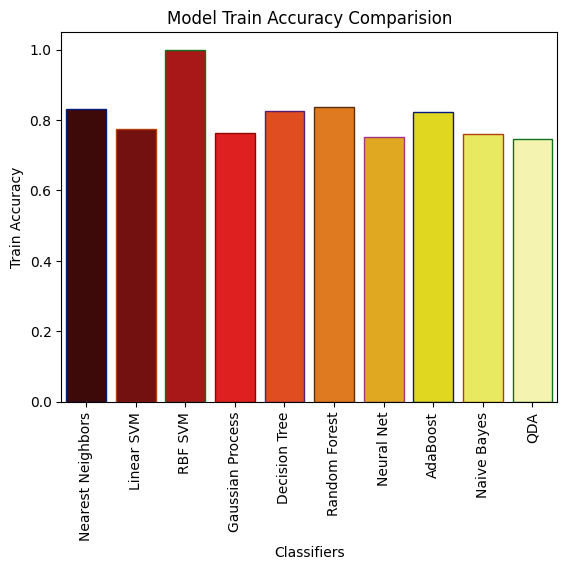

In [11]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Train Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train Accuracy Comparision')
plt.show()

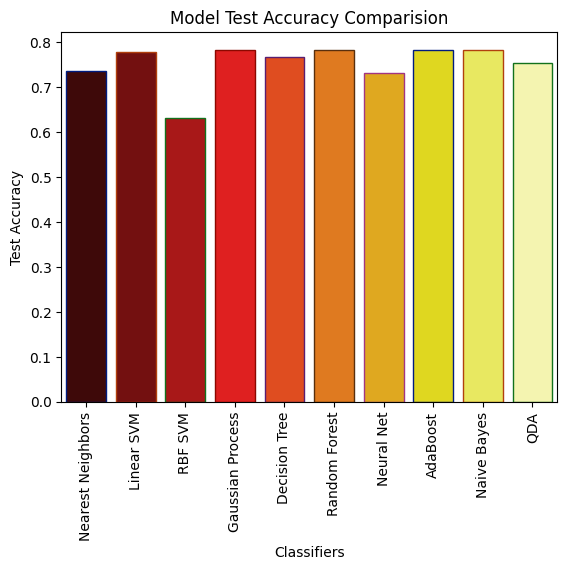

In [12]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Test Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
plt.show()

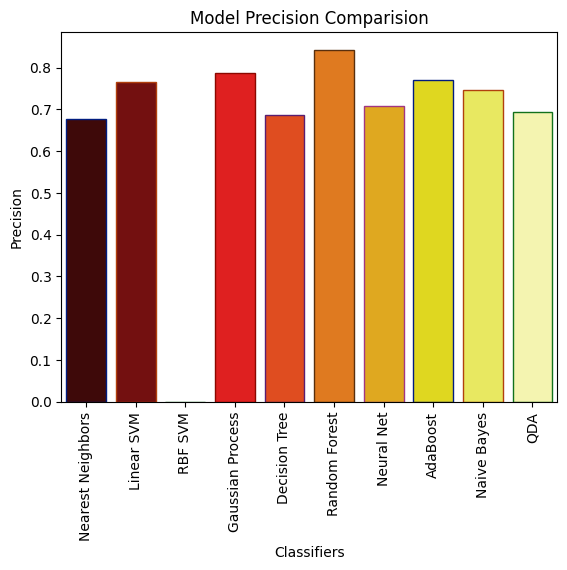

In [13]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Precision', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparision')
plt.show()

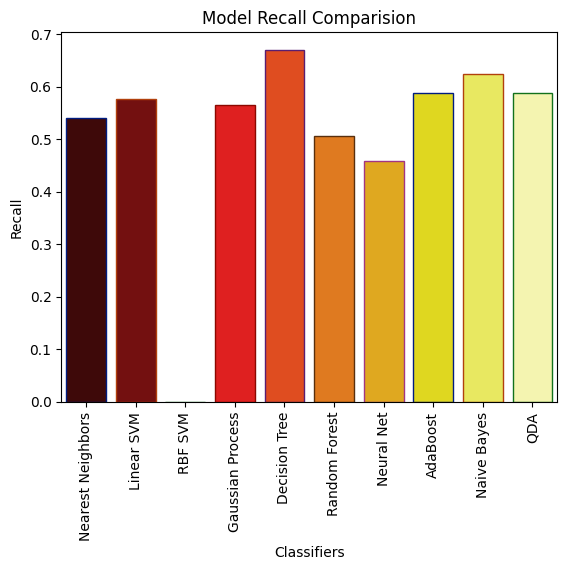

In [14]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Recall', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Recall Comparision')
plt.show()